# Text Classifier Models

---

# Data Loading and EDA

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/annotated_reviews_final.csv")
df.head()

,airline_name,title,date,rating_tag,review_text,review_summary,review_text_bn,review_summary_bn,Seat Sentiment,Food Sentiment,Staff Sentiment,Check-in Sentiment,Cleanliness Sentiment,Entertainment Sentiment,Punctuality Sentiment,Baggage Sentiment
0,biman-bangladesh,“will never fly this airline ever again”,20th August 2024,4,The overall experience onboard was much better...,The onboard experience was better than expecte...,সামগ্রিক অভিজ্ঞতাটি প্রত্যাশার চেয়ে অনেক ভাল ...,"অনবোর্ডের অভিজ্ঞতাটি প্রত্যাশার চেয়ে ভাল ছিল,...",Neutral,Negative,Negative,Negative,Negative,Neutral,Negative,Positive
1,biman-bangladesh,"""my worst experience""",7th May 2024,2,Had my worst experience while travelling with ...,Biman Bangladesh offers poor service with dela...,বিমান বাংলাদেশের সাথে ভ্রমণের সময় আমার সবচেয়...,বিলম্বিত ফ্লাইট সহ বিমান বাংলাদেশ দুর্বল পরিষে...,Positive,Negative,Positive,Negative,Neutral,Negative,Negative,Neutral
2,biman-bangladesh,"""Very high ticket flight""",10th February 2024,6,This is the national carrier of Bangladesh and...,"Slow check-in, delayed flight, basic in-flight...",এটি বাংলাদেশের জাতীয় বাহক এবং এর মাধ্যমে আমি ...,"ধীর চেক-ইন, বিলম্বিত ফ্লাইট, বেসিক ইন-ফ্লাইট স...",Positive,Negative,Neutral,Negative,Positive,Negative,Negative,Positive
3,biman-bangladesh,"""no information, no updates""",4th January 2024,1,"I urge you not to take this airline, even if ...","Negligent airline with poor customer service, ...",আমি আপনাকে অনুরোধ করছি যে এই বিমান সংস্থাটি না...,"দুর্বল গ্রাহক পরিষেবা সহ অবহেলা এয়ারলাইন, ইমে...",Neutral,Negative,Negative,Neutral,Positive,Neutral,Negative,Negative
4,biman-bangladesh,"""the service was extremely bad""",23rd August 2023,4,I chose Bangladesh Biman to fly from Dhaka t...,Overpriced Bangladesh Biman offered extremely ...,আমি Dhaka াকা থেকে টরন্টোতে উড়তে বাংলাদেশ বিম...,অতিরিক্ত মূল্যের বাংলাদেশ বিমন অত্যন্ত দুর্বল ...,Negative,Negative,Negative,Negative,Positive,Negative,Neutral,Negative


In [4]:
df.describe()

,airline_name,title,date,rating_tag,review_text,review_summary,review_text_bn,review_summary_bn,Seat Sentiment,Food Sentiment,Staff Sentiment,Check-in Sentiment,Cleanliness Sentiment,Entertainment Sentiment,Punctuality Sentiment,Baggage Sentiment
count,3900,3900,3900,3900,3900,3900,3900,3899,3900,3900,3900,3900,3900,3900,3900,3900
unique,15,2816,2385,113,3884,3882,3884,3883,4,4,4,4,4,4,4,3
top,biman-bangladesh,Biman Bangladesh customer review,14th January 2015,1,Flew Dhaka-Chennai-Coimbatore in December with...,"Good food, seating, and ground services, but p...",ফ্লাইট অ্যাটেনডেন্টরা তাদের কাজ হাসিমুখে করতে ...,"ফ্লাইটটি নিখুঁত ছিল, তবে খাবার এবং বোর্ডিং উন্...",Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative
freq,1619,345,9,1244,2,2,2,2,1513,1524,1937,1942,1478,1706,1862,1625


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

<ipython-input-7-61321024>:20: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


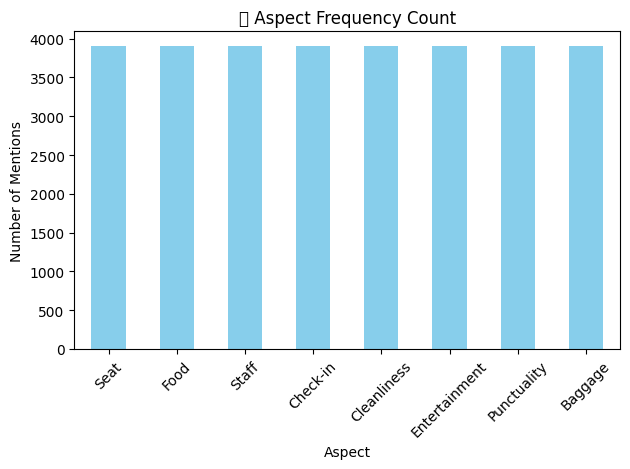

In [7]:
# List of aspect columns
aspect_cols = [
    "Seat Sentiment", "Food Sentiment", "Staff Sentiment",
    "Check-in Sentiment", "Cleanliness Sentiment",
    "Entertainment Sentiment", "Punctuality Sentiment", "Baggage Sentiment"
]

# Count non-null entries (i.e., mentioned) per aspect
aspect_mention_counts = {aspect.split()[0]: df[aspect].notna().sum() for aspect in aspect_cols}

# Convert to DataFrame for plotting
mention_df = pd.DataFrame.from_dict(aspect_mention_counts, orient='index', columns=['Mentions']).sort_values(by='Mentions', ascending=False)

# Plot
mention_df.plot(kind='bar', legend=False, color='skyblue')
plt.title("📌 Aspect Frequency Count")
plt.xlabel("Aspect")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-8-1273808129>:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


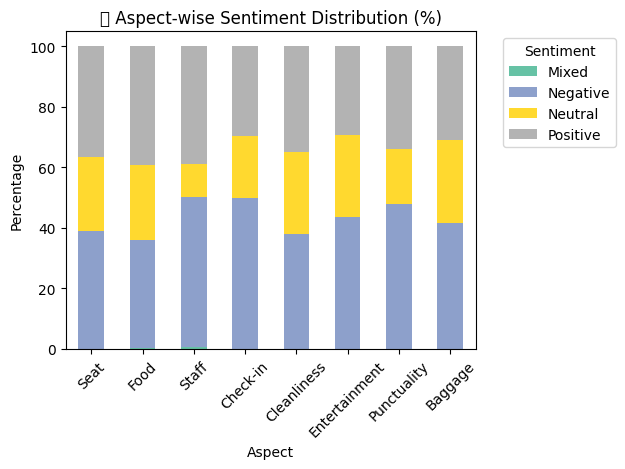

In [8]:
# Prepare sentiment counts per aspect
aspect_sentiment_data = {}

for aspect in aspect_cols:
    base = aspect.split()[0]
    sentiment_counts = df[aspect].value_counts()
    aspect_sentiment_data[base] = sentiment_counts

# Create DataFrame
sentiment_df = pd.DataFrame(aspect_sentiment_data).fillna(0).astype(int).T

# Optional: Normalize to percentage
sentiment_percentage_df = sentiment_df.div(sentiment_df.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
sentiment_percentage_df.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("📊 Aspect-wise Sentiment Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Aspect")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-9-1109984342>:21: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


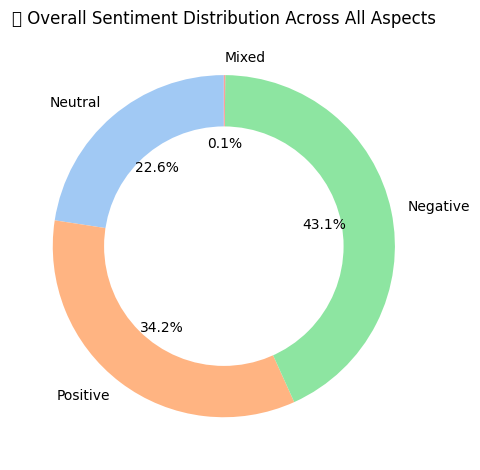

In [9]:
# Combine all sentiments across aspects into a single list
all_sentiments = []

for aspect in aspect_cols:
    all_sentiments.extend(df[aspect].dropna().tolist())

# Count sentiment occurrences
sentiment_counts = Counter(all_sentiments)
sentiment_labels = list(sentiment_counts.keys())
sentiment_values = list(sentiment_counts.values())

# Pie Chart
fig, ax = plt.subplots()
ax.pie(sentiment_values, labels=sentiment_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Donut in center
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title("🥧 Overall Sentiment Distribution Across All Aspects")
plt.tight_layout()
plt.show()

# Additional EDA

📊 Dataset Overview
       airline_name                                     title  \
0  biman-bangladesh  “will never fly this airline ever again”   
1  biman-bangladesh                     "my worst experience"   
2  biman-bangladesh                 "Very high ticket flight"   
3  biman-bangladesh              "no information, no updates"   
4  biman-bangladesh           "the service was extremely bad"   

                 date rating_tag  \
0    20th August 2024          4   
1        7th May 2024          2   
2  10th February 2024          6   
3    4th January 2024          1   
4    23rd August 2023          4   

                                         review_text  \
0  The overall experience onboard was much better...   
1  Had my worst experience while travelling with ...   
2  This is the national carrier of Bangladesh and...   
3   I urge you not to take this airline, even if ...   
4    I chose Bangladesh Biman to fly from Dhaka t...   

                                    

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


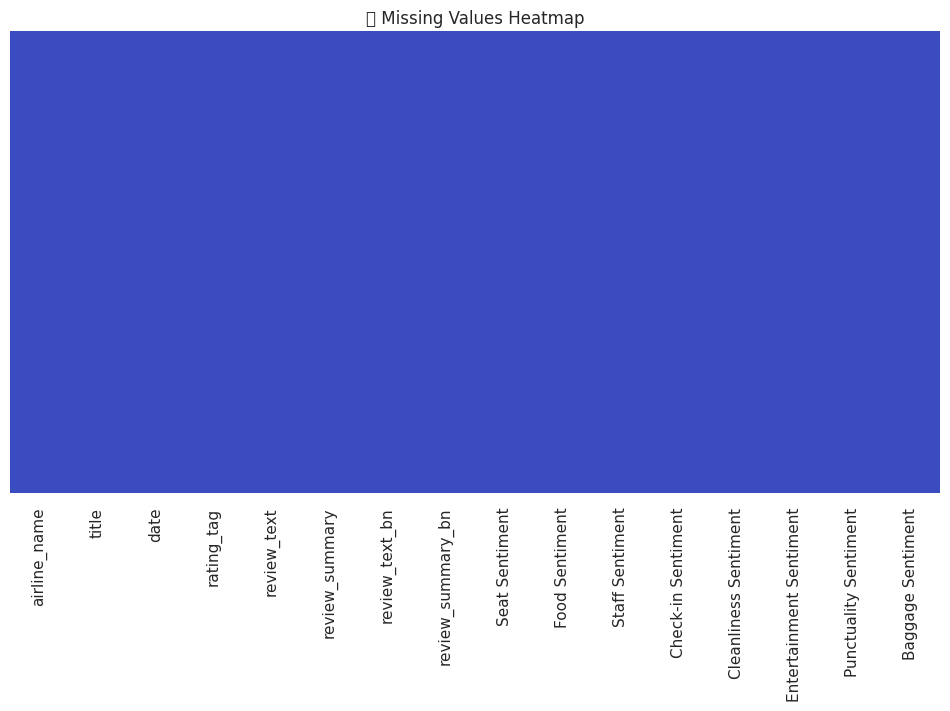

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



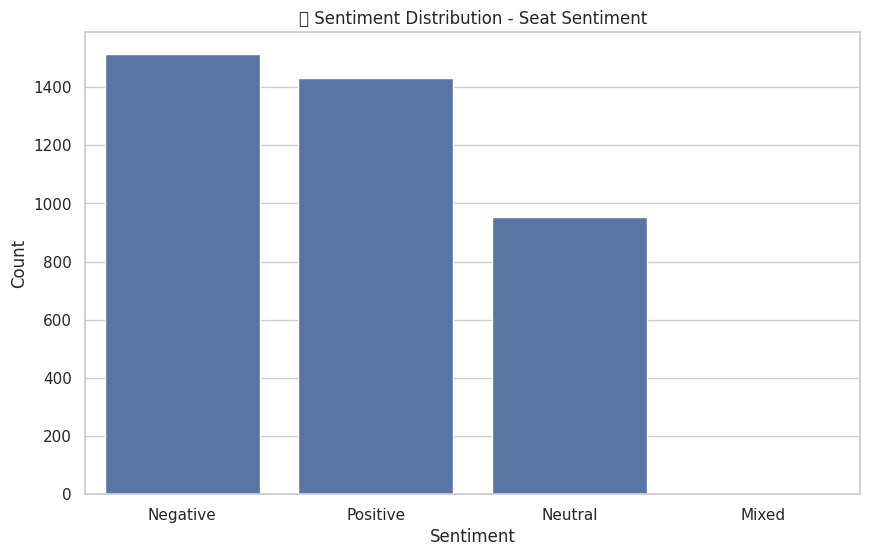

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



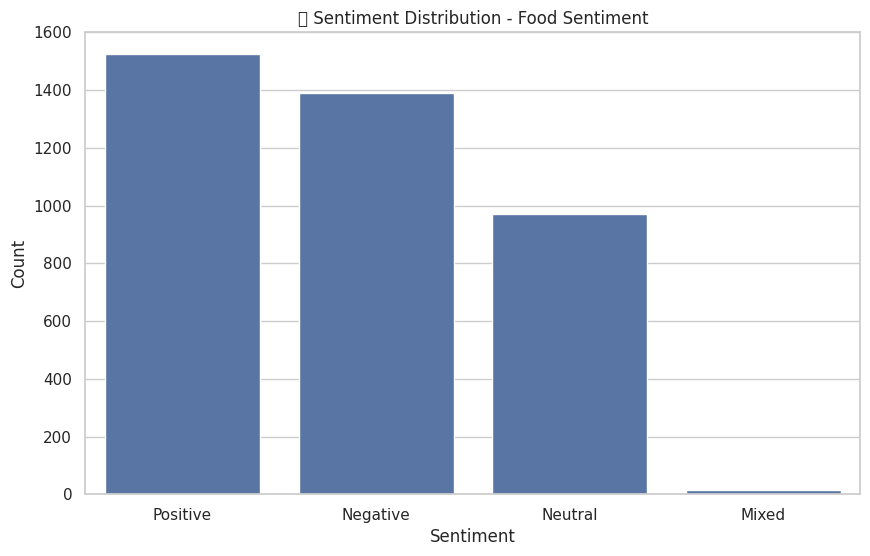

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



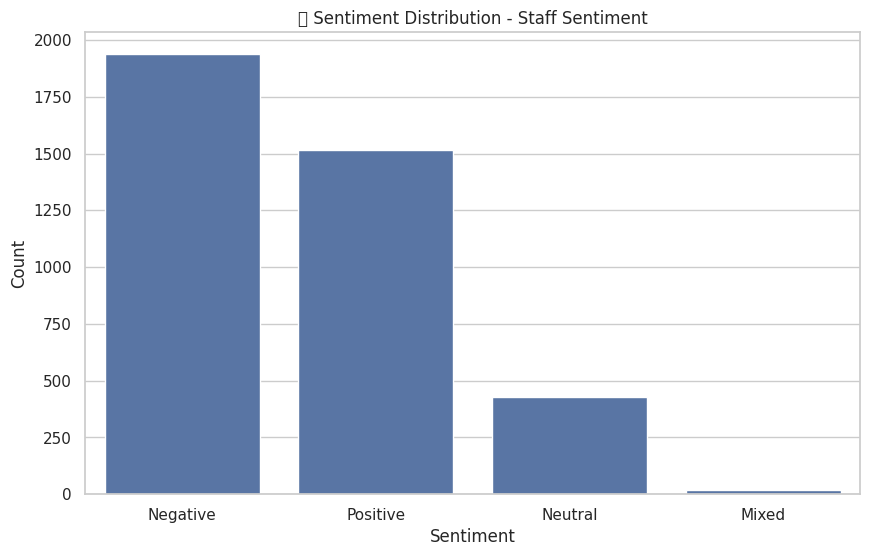

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



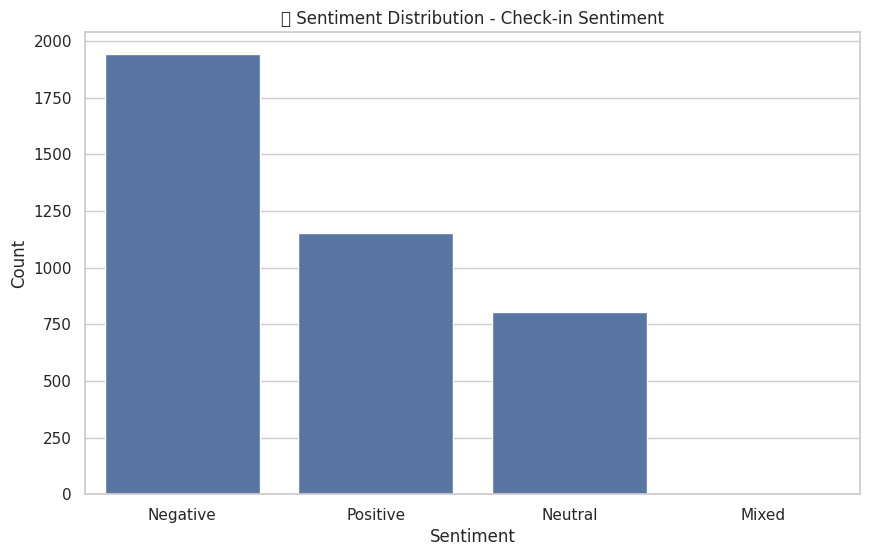

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



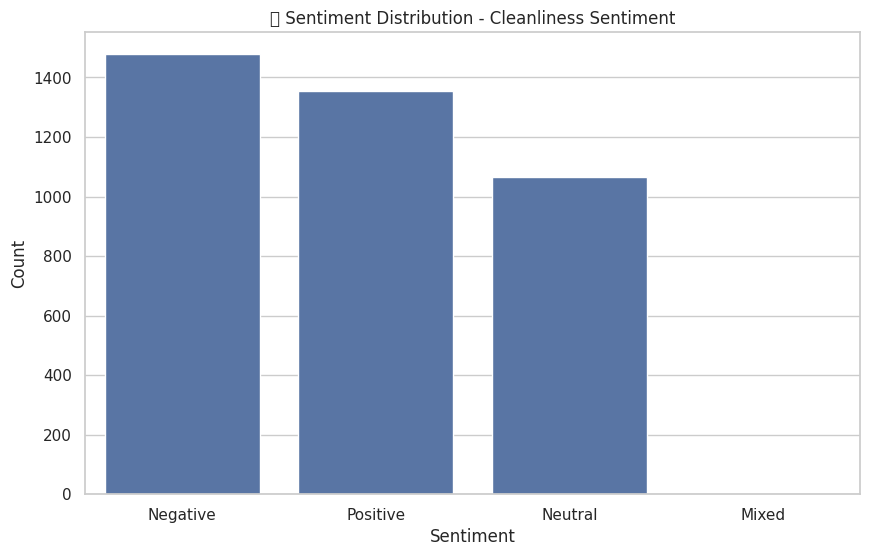

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



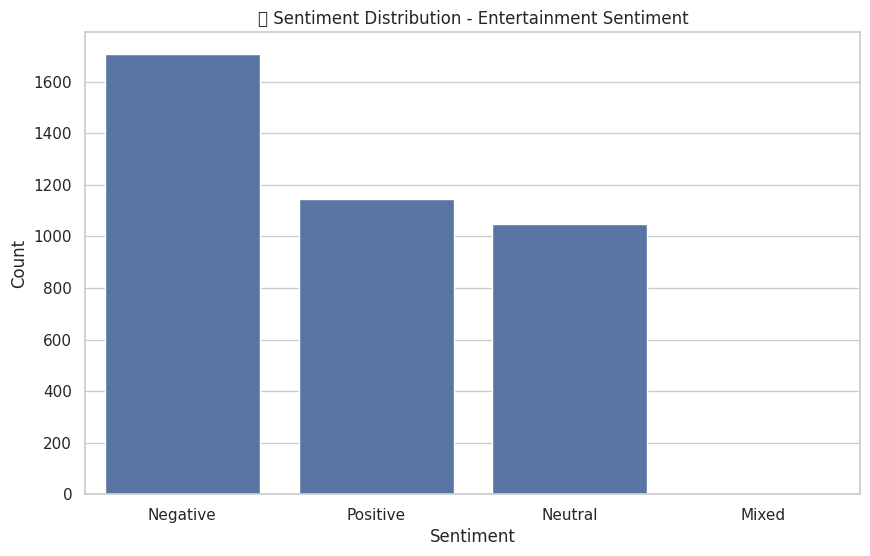

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



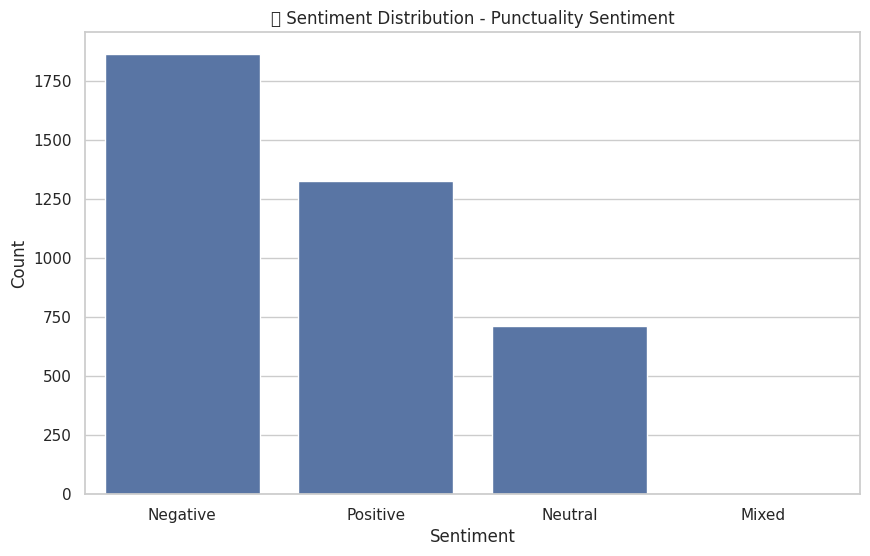

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



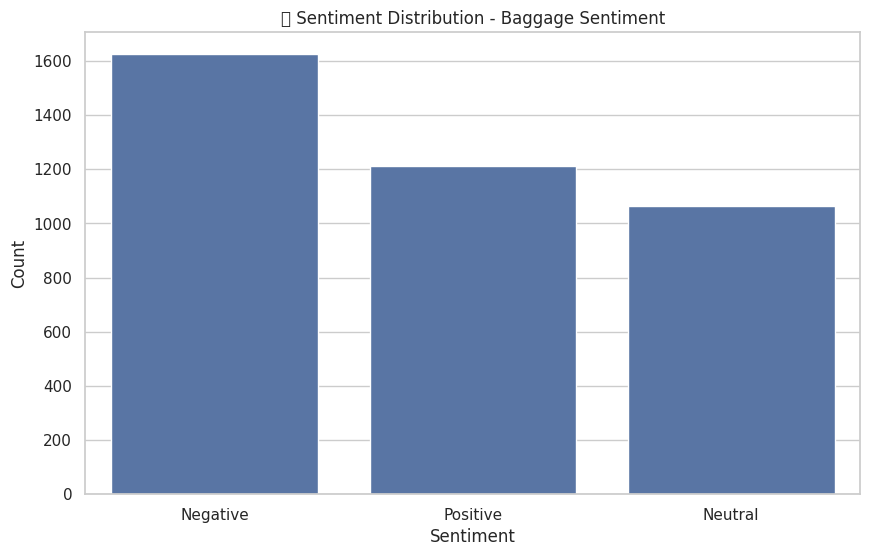

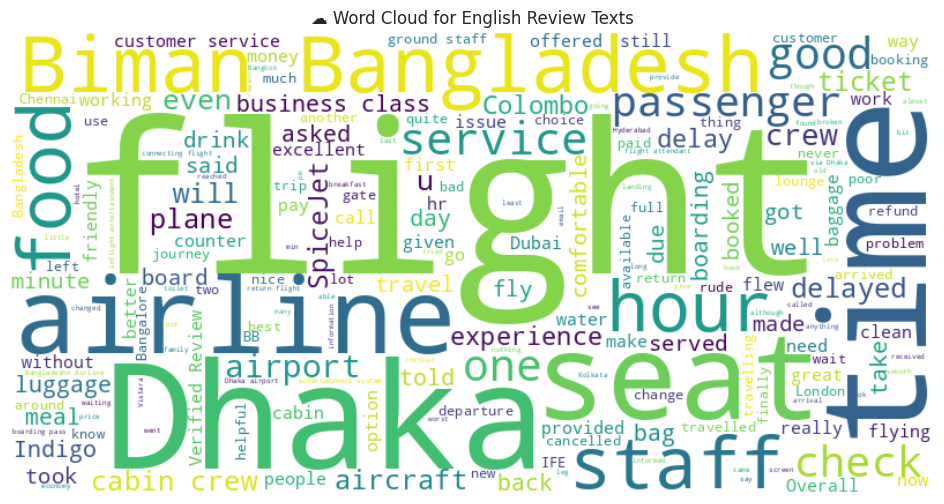

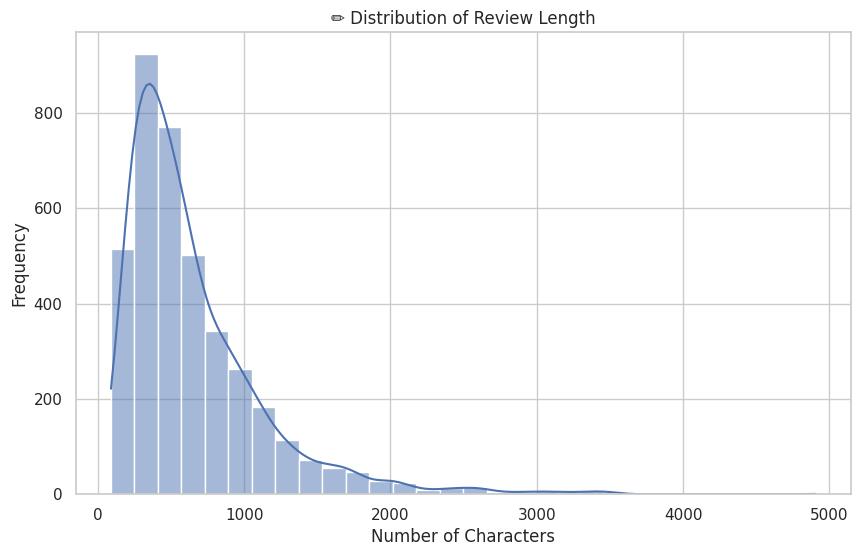

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



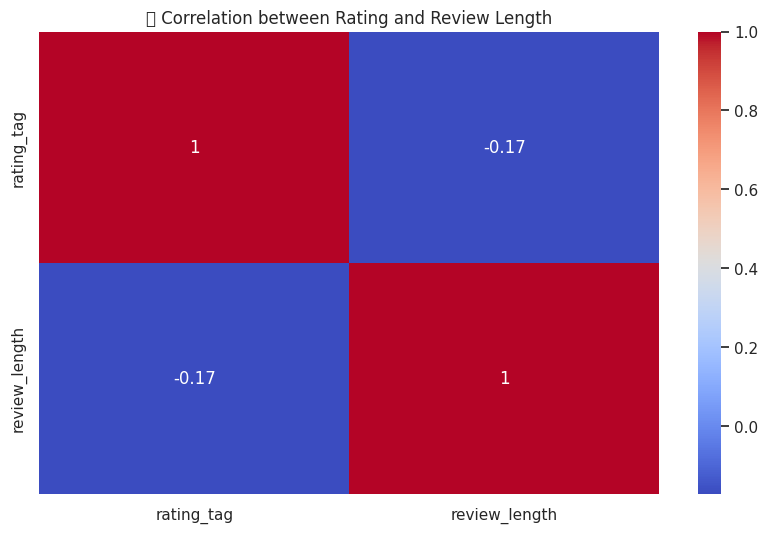

<ipython-input-11-2949849660>:99: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



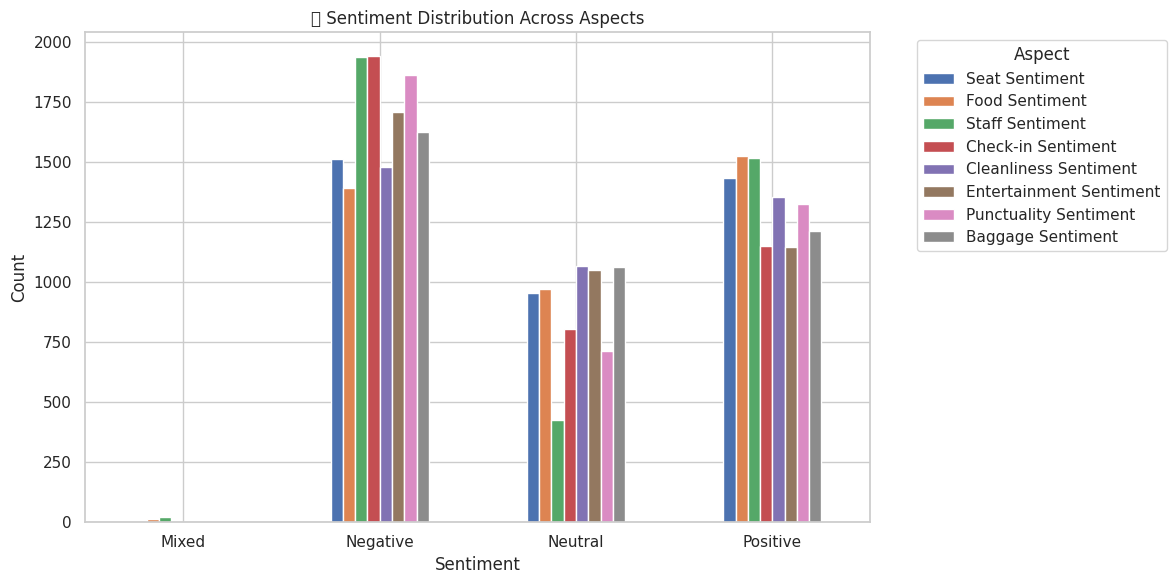

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Set up visual style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# ------------------------------
# 1. Basic Info
# ------------------------------
print("📊 Dataset Overview")
print(df.head())
print("\nℹ️ Dataset Info:")
print(df.info())
print("\n🧮 Missing Values:")
print(df.isnull().sum())

# ------------------------------
# 2. Missing Value Heatmap
# ------------------------------
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.title("🔍 Missing Values Heatmap")
plt.show()

# ------------------------------
# 3. Rating Distribution
# ------------------------------
fig = px.histogram(df, x='rating_tag', nbins=10, title='⭐ Rating Tag Distribution')
fig.show()

# ------------------------------
# 4. Sentiment Distribution Per Aspect
# ------------------------------
aspect_cols = [
    "Seat Sentiment", "Food Sentiment", "Staff Sentiment",
    "Check-in Sentiment", "Cleanliness Sentiment",
    "Entertainment Sentiment", "Punctuality Sentiment", "Baggage Sentiment"
]

for col in aspect_cols:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"📌 Sentiment Distribution - {col}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

# ------------------------------
# 5. Word Cloud of English Review Texts
# ------------------------------
text_all = ' '.join(df['review_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("☁️ Word Cloud for English Review Texts")
plt.show()

# ------------------------------
# 6. Review Length Distribution
# ------------------------------
df['review_length'] = df['review_text'].astype(str).apply(len)

sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("✏️ Distribution of Review Length")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# ------------------------------
# 7. Correlation Heatmap of Review Length and Rating
# ------------------------------
df['rating_tag'] = pd.to_numeric(df['rating_tag'], errors='coerce')
corr_df = df[['rating_tag', 'review_length']].dropna()

sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("📈 Correlation between Rating and Review Length")
plt.show()

# ------------------------------
# 8. Aspect Sentiment Crosstab
# ------------------------------
sentiment_counts = {}
for col in aspect_cols:
    sentiment_counts[col] = df[col].value_counts()

sentiment_df = pd.DataFrame(sentiment_counts).fillna(0).astype(int)
sentiment_df.plot(kind='bar', figsize=(12, 6))
plt.title("📊 Sentiment Distribution Across Aspects")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Aspect', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Preprocessing

In [13]:
df_cleaned = pd.read_csv("/content/annotated_reviews_final.csv")

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Define aspects
aspect_cols = [
    "Seat Sentiment", "Food Sentiment", "Staff Sentiment",
    "Check-in Sentiment", "Cleanliness Sentiment",
    "Entertainment Sentiment", "Punctuality Sentiment", "Baggage Sentiment"
]

# Drop rows where all aspect sentiments are NaN
df_cleaned = df.dropna(subset=aspect_cols, how='all').copy()

# Fill NaNs with "None" to represent no sentiment expressed
df_cleaned[aspect_cols] = df_cleaned[aspect_cols].fillna("None")

# Convert text labels to numerical multi-label binary format
mlb = MultiLabelBinarizer(classes=['Positive', 'Neutral', 'Negative', 'None'])

# For each aspect, convert sentiment into a 3-class label encoding
def get_label_vectors(df, aspects):
    Y = {}
    for col in aspects:
        y = mlb.fit_transform(df[[col]].values)
        Y[col.split()[0]] = y
    return Y

# Split dataset
df_train, df_test = train_test_split(df_cleaned, test_size=0.2, random_state=42)

X_train = df_train['review_text'].values
X_test = df_test['review_text'].values

# Get ground truths for all models
Y_dict_train = get_label_vectors(df_train, aspect_cols)
Y_dict_test = get_label_vectors(df_test, aspect_cols)

# SVM with OneVsRest

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

svm_reports = {}

# Vectorize text
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(df_train['review_text'])
X_test_tfidf = tfidf.transform(df_test['review_text'])

for i, aspect in enumerate(aspect_cols):
    label = aspect.split()[0]
    y_train = Y_dict_train[label][:, :3]  # exclude 'None'
    y_test = Y_dict_test[label][:, :3]

    svm = OneVsRestClassifier(LinearSVC())
    svm.fit(X_train_tfidf, y_train)
    y_pred = svm.predict(X_test_tfidf)

    report = classification_report(y_test, y_pred, target_names=mlb.classes_[:3], output_dict=True)
    svm_reports[label] = report


📊 Model Evaluation Reports (SVM - OneVsRestClassifier with LinearSVC):

--- Aspect: Seat ---
Macro Avg Precision: 0.5038
Macro Avg Recall: 0.3737
Macro Avg F1-score: 0.4276

--- Aspect: Food ---
Macro Avg Precision: 0.5095
Macro Avg Recall: 0.3640
Macro Avg F1-score: 0.4215

--- Aspect: Staff ---
Macro Avg Precision: 0.5950
Macro Avg Recall: 0.5157
Macro Avg F1-score: 0.5345

--- Aspect: Check-in ---
Macro Avg Precision: 0.4657
Macro Avg Recall: 0.3744
Macro Avg F1-score: 0.4094

--- Aspect: Cleanliness ---
Macro Avg Precision: 0.4439
Macro Avg Recall: 0.3058
Macro Avg F1-score: 0.3593

--- Aspect: Entertainment ---
Macro Avg Precision: 0.4013
Macro Avg Recall: 0.2952
Macro Avg F1-score: 0.3384

--- Aspect: Punctuality ---
Macro Avg Precision: 0.4977
Macro Avg Recall: 0.4094
Macro Avg F1-score: 0.4422

--- Aspect: Baggage ---
Macro Avg Precision: 0.3931
Macro Avg Recall: 0.2658
Macro Avg F1-score: 0.3153

--- Evaluation Summary DataFrame ---


,macro_precision,macro_recall,macro_f1
Seat,0.503802,0.373679,0.427626
Food,0.509537,0.364015,0.421493
Staff,0.594972,0.515700,0.534535
Check-in,0.465731,0.374437,0.409413
Cleanliness,0.443945,0.305803,0.359340
Entertainment,0.401350,0.295173,0.338447
Punctuality,0.497663,0.409420,0.442225
Baggage,0.393131,0.265815,0.315287


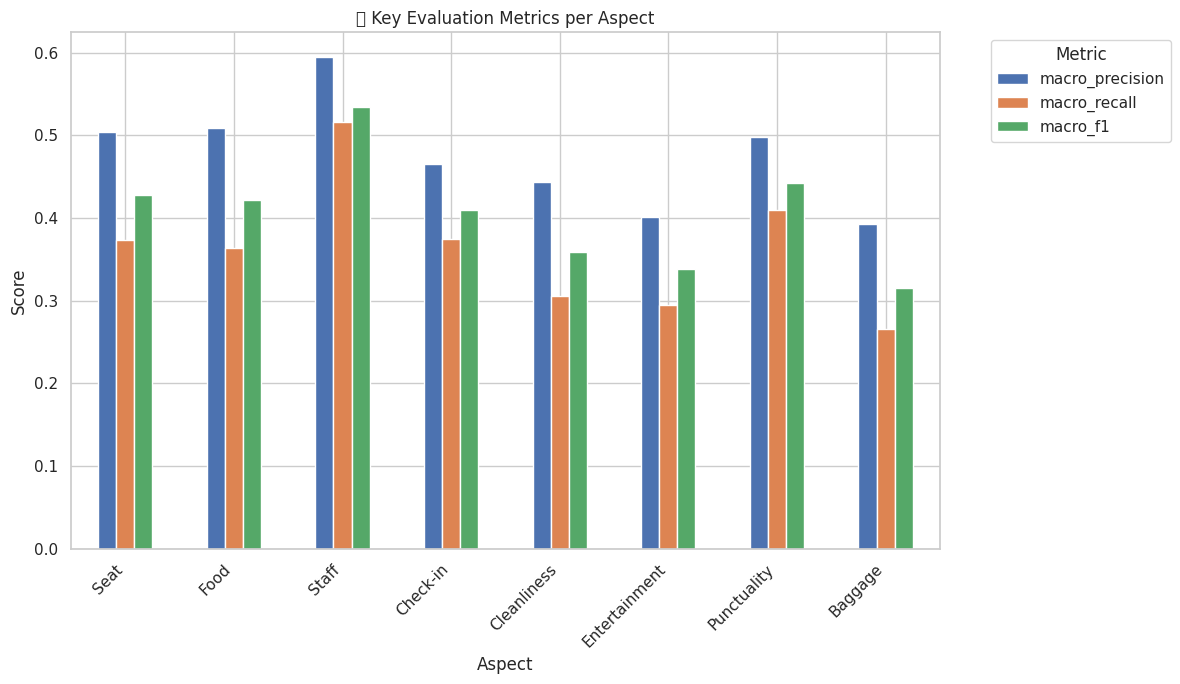

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Model Evaluation Reports (SVM - OneVsRestClassifier with LinearSVC):")

evaluation_summary = {}

for aspect, report in svm_reports.items():
    print(f"\n--- Aspect: {aspect} ---")
    if 'micro avg' in report and 'accuracy' in report['micro avg']:
      accuracy = report['micro avg']['accuracy']
      print(f"Accuracy: {accuracy:.4f}")


    # Calculate macro average metrics for precision, recall, and F1-score
    macro_precision = report['macro avg']['precision']
    macro_recall = report['macro avg']['recall']
    macro_f1 = report['macro avg']['f1-score']

    print(f"Macro Avg Precision: {macro_precision:.4f}")
    print(f"Macro Avg Recall: {macro_recall:.4f}")
    print(f"Macro Avg F1-score: {macro_f1:.4f}")

    # Store metrics for potential later use (e.g., plotting)
    evaluation_summary[aspect] = {
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

# Optional: Display summary in a DataFrame
summary_df = pd.DataFrame.from_dict(evaluation_summary, orient='index')
print("\n--- Evaluation Summary DataFrame ---")
display(summary_df)

# Optional: Plotting key metrics
summary_df[['macro_precision', 'macro_recall', 'macro_f1']].plot(kind='bar', figsize=(12, 7))
plt.title("📉 Key Evaluation Metrics per Aspect")
plt.ylabel("Score")
plt.xlabel("Aspect")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_reports = {}

for i, aspect in enumerate(aspect_cols):
    label = aspect.split()[0]
    y_train = Y_dict_train[label][:, :3]
    y_test = Y_dict_test[label][:, :3]

    rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
    rf.fit(X_train_tfidf, y_train)
    y_pred = rf.predict(X_test_tfidf)

    report = classification_report(y_test, y_pred, target_names=mlb.classes_[:3], output_dict=True)
    rf_reports[label] = report


📊 Model Evaluation Reports (Random Forest - OneVsRestClassifier):

--- Aspect: Seat ---
Macro Avg Precision: 0.5044
Macro Avg Recall: 0.1768
Macro Avg F1-score: 0.2605

--- Aspect: Food ---
Macro Avg Precision: 0.5516
Macro Avg Recall: 0.1649
Macro Avg F1-score: 0.2301

--- Aspect: Staff ---
Macro Avg Precision: 0.7419
Macro Avg Recall: 0.5009
Macro Avg F1-score: 0.5205

--- Aspect: Check-in ---
Macro Avg Precision: 0.4721
Macro Avg Recall: 0.2644
Macro Avg F1-score: 0.3113

--- Aspect: Cleanliness ---
Macro Avg Precision: 0.7765
Macro Avg Recall: 0.1343
Macro Avg F1-score: 0.2190

--- Aspect: Entertainment ---
Macro Avg Precision: 0.5014
Macro Avg Recall: 0.1338
Macro Avg F1-score: 0.1804

--- Aspect: Punctuality ---
Macro Avg Precision: 0.4919
Macro Avg Recall: 0.2940
Macro Avg F1-score: 0.3566

--- Aspect: Baggage ---
Macro Avg Precision: 0.5075
Macro Avg Recall: 0.0948
Macro Avg F1-score: 0.1391

--- Random Forest Evaluation Summary DataFrame ---


,macro_precision,macro_recall,macro_f1
Seat,0.504386,0.176820,0.260509
Food,0.551617,0.164922,0.230098
Staff,0.741889,0.500948,0.520467
Check-in,0.472126,0.264440,0.311318
Cleanliness,0.776516,0.134264,0.219044
Entertainment,0.501369,0.133773,0.180420
Punctuality,0.491867,0.294025,0.356586
Baggage,0.507492,0.094762,0.139054


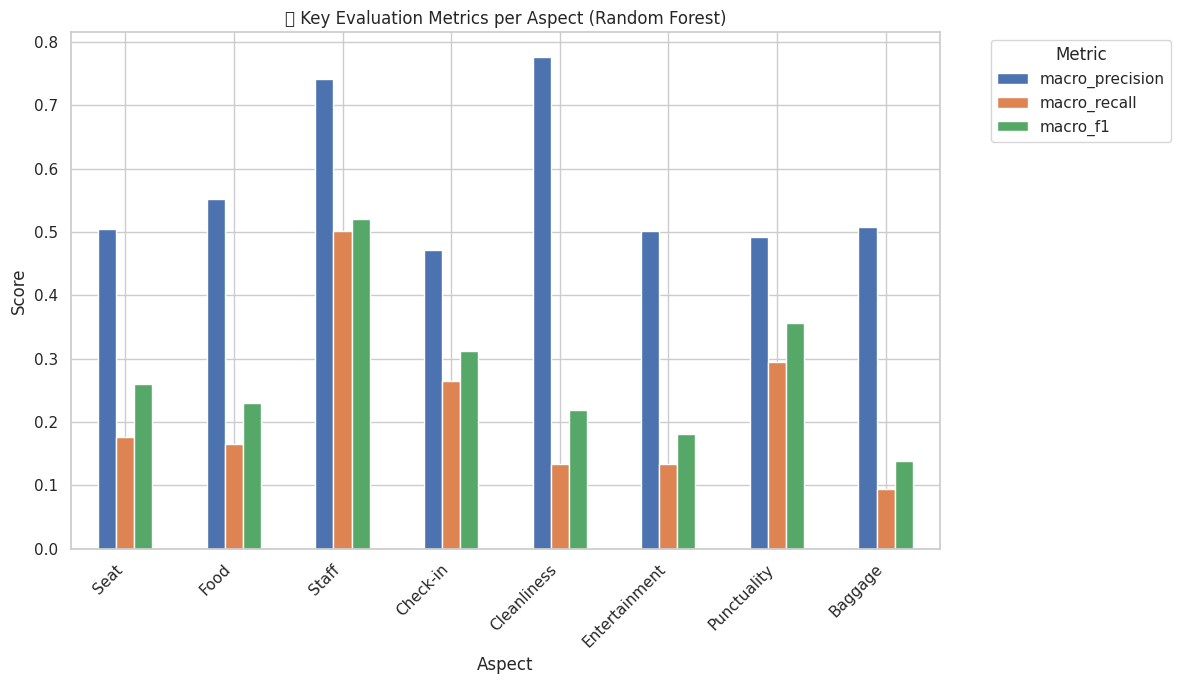

In [36]:
print("\n📊 Model Evaluation Reports (Random Forest - OneVsRestClassifier):")

rf_evaluation_summary = {}

for aspect, report in rf_reports.items():
    print(f"\n--- Aspect: {aspect} ---")
    if 'micro avg' in report and 'accuracy' in report['micro avg']:
      accuracy = report['micro avg']['accuracy']
      print(f"Accuracy: {accuracy:.4f}")

    macro_precision = report['macro avg']['precision']
    macro_recall = report['macro avg']['recall']
    macro_f1 = report['macro avg']['f1-score']

    print(f"Macro Avg Precision: {macro_precision:.4f}")
    print(f"Macro Avg Recall: {macro_recall:.4f}")
    print(f"Macro Avg F1-score: {macro_f1:.4f}")

    rf_evaluation_summary[aspect] = {
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

print("\n--- Random Forest Evaluation Summary DataFrame ---")
rf_summary_df = pd.DataFrame.from_dict(rf_evaluation_summary, orient='index')
display(rf_summary_df)

rf_summary_df[['macro_precision', 'macro_recall', 'macro_f1']].plot(kind='bar', figsize=(12, 7))
plt.title("📉 Key Evaluation Metrics per Aspect (Random Forest)")
plt.ylabel("Score")
plt.xlabel("Aspect")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# BERT

In [46]:
pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import Dataset

# Set seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# ✅ Load your dataset
df = pd.read_csv('/content/annotated_reviews_final.csv')  # Replace with actual file name

# ✅ Define columns
text_column = 'review_text'
sentiment_map = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

aspect_cols = ['Seat Sentiment', 'Food Sentiment', 'Staff Sentiment', 'Check-in Sentiment',
               'Cleanliness Sentiment', 'Entertainment Sentiment', 'Punctuality Sentiment', 'Baggage Sentiment']

# If you have the original string labels, apply map:
for col in aspect_cols:
    df[col] = df[col].map(sentiment_map)

# Confirm all labels are within 0–2 range
for col in aspect_cols:
    print(f"{col}: {df[col].unique()}")

# ✅ Drop rows with missing review or sentiment
df.dropna(subset=[text_column] + aspect_cols, inplace=True)

# ✅ Preview
print("✔️ Columns present:", df.columns.tolist())
print("✔️ Data shape after cleaning:", df.shape)

# ✅ Encode sentiments (e.g., 'Positive' -> 2, 'Neutral' -> 1, 'Negative' -> 0)
label_encoders = {}
for col in aspect_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ✅ Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# ✅ Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["review_text"], padding="max_length", truncation=True, max_length=128)

# ✅ Create HuggingFace datasets
train_dataset = Dataset.from_pandas(train_df[['review_text'] + aspect_cols])
test_dataset = Dataset.from_pandas(test_df[['review_text'] + aspect_cols])

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# ✅ Set format for PyTorch
train_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask'] + aspect_cols)
test_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask'] + aspect_cols)

Seat Sentiment: [ 1.  2.  0. nan]
Food Sentiment: [ 0.  1.  2. nan]
Staff Sentiment: [ 0.  2.  1. nan]
Check-in Sentiment: [ 0.  1.  2. nan]
Cleanliness Sentiment: [ 0.  1.  2. nan]
Entertainment Sentiment: [ 1.  0.  2. nan]
Punctuality Sentiment: [ 0.  1.  2. nan]
Baggage Sentiment: [2 1 0]
✔️ Columns present: ['airline_name', 'title', 'date', 'rating_tag', 'review_text', 'review_summary', 'review_text_bn', 'review_summary_bn', 'Seat Sentiment', 'Food Sentiment', 'Staff Sentiment', 'Check-in Sentiment', 'Cleanliness Sentiment', 'Entertainment Sentiment', 'Punctuality Sentiment', 'Baggage Sentiment']
✔️ Data shape after cleaning: (3865, 16)


Map:   0%|          | 0/3092 [00:00<?, ? examples/s]

Map:   0%|          | 0/773 [00:00<?, ? examples/s]

In [8]:
print(df['Seat Sentiment'].unique())
print(df['Food Sentiment'].unique())
print(df['Staff Sentiment'].unique())
print(df['Check-in Sentiment'].unique())
print(df['Cleanliness Sentiment'].unique())
print(df['Entertainment Sentiment'].unique())
print(df['Punctuality Sentiment'].unique())
print(df['Baggage Sentiment'].unique())

[1 2 0]
[0 1 2]
[0 2 1]
[0 1 2]
[0 1 2]
[1 0 2]
[0 1 2]
[2 1 0]


## Please train the epochs with at least 5 epochs. I have used 0.1 as experimental for the faster training.

In [11]:
# ✅ Define model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # 3 for Positive, Neutral, Negative

# ✅ TrainingArguments
training_args = TrainingArguments(
    output_dir="./bert_aspect_output",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=0.1,
    logging_dir="./logs",
)

# ✅ Train a separate model for each aspect
results = {}

for aspect in aspect_cols:
    print(f"\n🔍 Training model for aspect: {aspect}")

    def compute_metrics(pred):
        preds = np.argmax(pred.predictions, axis=1)
        labels = pred.label_ids
        return classification_report(labels, preds, output_dict=True, zero_division=0)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

    train_dataset_aspect = train_dataset.rename_column(aspect, "labels")
    test_dataset_aspect = test_dataset.rename_column(aspect, "labels")

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset_aspect,
        eval_dataset=test_dataset_aspect,
        tokenizer=tokenizer
    )

    trainer.train()
    predictions = trainer.predict(test_dataset_aspect)

    y_pred = np.argmax(predictions.predictions, axis=1)
    y_true = predictions.label_ids
    decoded_labels = label_encoders[aspect].inverse_transform(y_true)
    decoded_preds = label_encoders[aspect].inverse_transform(y_pred)

    report = classification_report(decoded_labels, decoded_preds, output_dict=False, zero_division=0)
    print(report)
    results[aspect] = report


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🔍 Training model for aspect: Seat Sentiment


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3104796512>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


              precision    recall  f1-score   support

         0.0       0.40      0.99      0.57       307
         1.0       0.00      0.00      0.00       173
         2.0       0.27      0.01      0.02       293

    accuracy                           0.40       773
   macro avg       0.22      0.33      0.20       773
weighted avg       0.26      0.40      0.23       773


🔍 Training model for aspect: Food Sentiment


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3104796512>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       289
         1.0       0.00      0.00      0.00       186
         2.0       0.39      1.00      0.56       298

    accuracy                           0.39       773
   macro avg       0.13      0.33      0.19       773
weighted avg       0.15      0.39      0.21       773


🔍 Training model for aspect: Staff Sentiment


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3104796512>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86       404
         1.0       0.00      0.00      0.00        74
         2.0       0.80      0.83      0.82       295

    accuracy                           0.80       773
   macro avg       0.54      0.59      0.56       773
weighted avg       0.73      0.80      0.76       773


🔍 Training model for aspect: Check-in Sentiment


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3104796512>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       388
         1.0       0.00      0.00      0.00       159
         2.0       0.42      0.73      0.53       226

    accuracy                           0.55       773
   macro avg       0.37      0.47      0.41       773
weighted avg       0.47      0.55      0.50       773


🔍 Training model for aspect: Cleanliness Sentiment


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3104796512>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


              precision    recall  f1-score   support

         0.0       0.37      1.00      0.54       289
         1.0       0.00      0.00      0.00       205
         2.0       0.00      0.00      0.00       279

    accuracy                           0.37       773
   macro avg       0.12      0.33      0.18       773
weighted avg       0.14      0.37      0.20       773


🔍 Training model for aspect: Entertainment Sentiment


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3104796512>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


              precision    recall  f1-score   support

         0.0       0.45      0.92      0.61       341
         1.0       0.00      0.00      0.00       203
         2.0       0.25      0.08      0.12       229

    accuracy                           0.43       773
   macro avg       0.23      0.33      0.24       773
weighted avg       0.27      0.43      0.30       773


🔍 Training model for aspect: Punctuality Sentiment


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3104796512>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


              precision    recall  f1-score   support

         0.0       0.57      0.84      0.68       387
         1.0       0.00      0.00      0.00       134
         2.0       0.53      0.43      0.47       252

    accuracy                           0.56       773
   macro avg       0.37      0.42      0.39       773
weighted avg       0.46      0.56      0.50       773


🔍 Training model for aspect: Baggage Sentiment


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3104796512>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


              precision    recall  f1-score   support

           0       0.49      0.57      0.53       324
           1       0.27      0.21      0.24       197
           2       0.38      0.37      0.37       252

    accuracy                           0.41       773
   macro avg       0.38      0.38      0.38       773
weighted avg       0.40      0.41      0.40       773



## Note that for faster training, i have only used 0.1 epochs, make sure it is at least 3 epochs for the best result!